| | |
|:----------|:----------|
| Name      | Bayesian Modeling Workshop |
| Notebook  | Hypothesis testing |
| Author    | Joshuah Touyz, PhD |
| Version   | 0.1 |
|Last update| 02/29/20 |

In [40]:
import pymc3 as pm
import seaborn as sb
import warnings
import numpy as np
warnings.filterwarnings("ignore")
# warnings.filterwarnings("default")


In [30]:
# Observations
n = 1000
obs_a = 650
obs_b = 600

In [34]:
# Setting beta-binomial model
with pm.Model() as model: # context management
    # Defining priors
    prior_a = pm.Beta('prior_a', alpha=1/2, beta=1/2)
    prior_b = pm.Beta('prior_b', alpha=1/2, beta=1/2)
    
    # Likelihood
    like_a = pm.Binomial('like_a', n=n, p=prior_a, observed=obs_a)
    like_b = pm.Binomial('like_b', n=n, p=prior_b, observed=obs_b)

    # Defining KPIs
    pm.Deterministic('difference', prior_a - prior_b - 0.05)
    pm.Deterministic('ratio', (prior_a/prior_b) - 1.1)
    
    # Sample from the posterior distribution
    trace = pm.sample(draws=10000,
                      chains = 2,
                      cores = 2,
                      step=pm.Metropolis(),
                      start=pm.find_MAP(), 
                      progressbar=True)

logp = -74.032, ||grad|| = 180.28: 100%|██████████| 7/7 [00:00<00:00, 3936.73it/s]
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [prior_b]
>Metropolis: [prior_a]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [00:02<00:00, 8130.09draws/s]
The number of effective samples is smaller than 25% for some parameters.


### Checking to make sure the distribtuion converged

/Users/joshuahtouyz/Desktop/projects/project_1/p1_venv/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/joshuahtouyz/Desktop/projects/project_1/p1_venv/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/joshuahtouyz/Desktop/projects/project_1/p1_venv/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/joshuahtouyz/Desktop/projects/project_1/p1_venv/lib/python3.7/site-packages/arviz/plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1414ce668>,
      dtype=object)

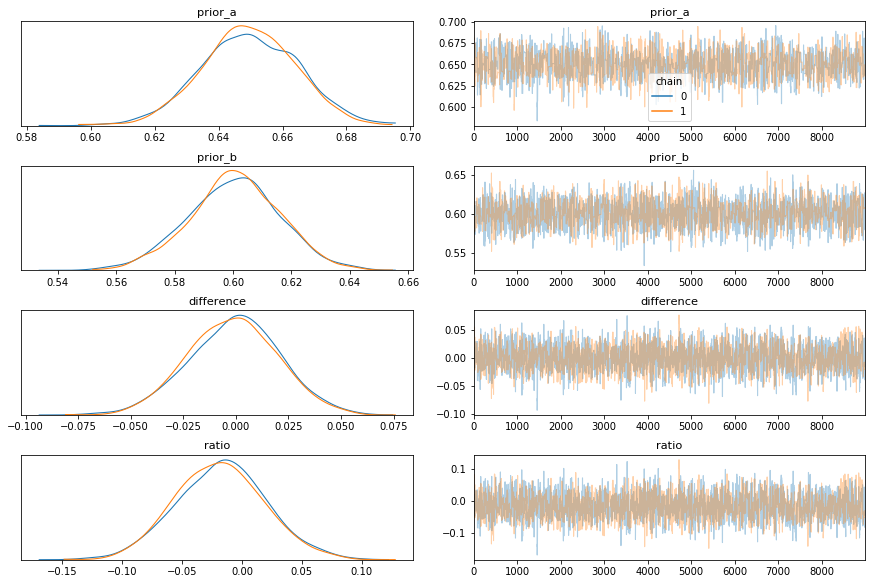

In [35]:
# Posterior checks, does the distribution make sense?
pm.traceplot(trace[1000:], legend = True)

/Users/joshuahtouyz/Desktop/projects/project_1/p1_venv/lib/python3.7/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


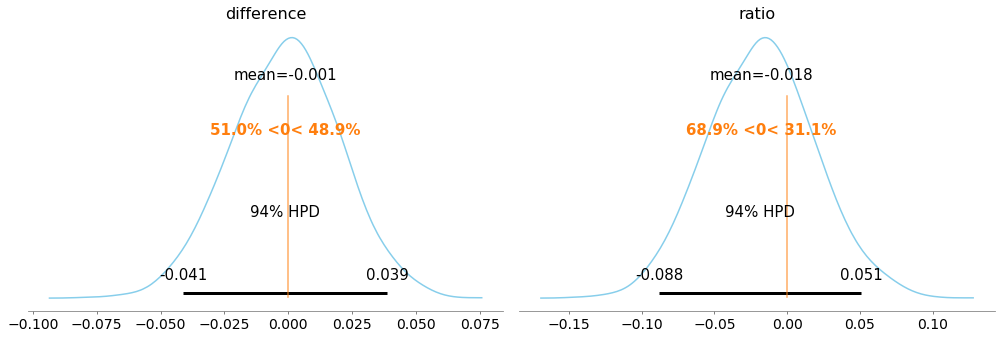

In [36]:
_ = pm.plot_posterior(trace[1000:], varnames=['difference', 'ratio'], ref_val=0, color='#87ceeb')

### What is the probability of ad A being is better than B by at least 5%
$$
\Pr(\theta_a-\theta_b>0.05|\mathbf{x})
$$

In [43]:
print('The probability that the ratio is greater that 10% is {}'.format(np.mean(trace['difference'] > 0)))

The probability that the ratio is greater that 10% is 0.48855


### What is the probability ad A produces more than a 10% lift than ad B!
$$
\Pr(\theta_a/\theta_b>1.1|\mathbf{x})
$$

In [42]:
print('The probability that the ratio is greater that 10% is {}'.format(np.mean(trace['ratio'] > 0)))

The probability that the ratio is greater that 10% is 0.3101
